# **BUSINESS CASE 2: SIEMENS ADVANTA SALES FORECASTING**  


## 🎓 Master’s Program in Data Science & Advanced Analytics 
**Nova IMS** | March 2025   
**Course:** Business Cases with Data Science

## 👥 Team **Group A**  
- **Alice Viegas** | 20240572  
- **Bernardo Faria** | 20240579  
- **Dinis Pinto** | 20240612  
- **Daan van Holten** | 20240681
- **Philippe Dutranoit** | 20240518

## 📊 Goal of the notebook

this notebook is used to predict the market data over 10 months and perform some feature selction 

# imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet


In [13]:
df_market = pd.read_csv('../Data/df_market.csv')
info_market = pd.read_csv('../Data/info_market.csv')
df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    219 non-null    object 
 1   MAB_ELE_PRO156          219 non-null    float64
 2   MAB_ELE_SHP156          219 non-null    float64
 3   MAB_ELE_PRO250          219 non-null    float64
 4   MAB_ELE_SHP250          219 non-null    float64
 5   MAB_ELE_PRO276          219 non-null    float64
 6   MAB_ELE_SHP276          219 non-null    float64
 7   MAB_ELE_PRO380          219 non-null    float64
 8   MAB_ELE_SHP380          219 non-null    float64
 9   MAB_ELE_PRO392          219 non-null    float64
 10  MAB_ELE_SHP392          219 non-null    float64
 11  MAB_ELE_PRO756          218 non-null    float64
 12  MAB_ELE_SHP756          218 non-null    float64
 13  MAB_ELE_PRO826          219 non-null    float64
 14  MAB_ELE_SHP826          201 non-null    fl

In [14]:
def forecast_market_features_prophet(market_df, date_column='date', forecast_horizon=10, plot=True):
    """
    Forecasts each column (market feature) in the DataFrame for the next N months using Facebook Prophet.

    Parameters:
        market_df (pd.DataFrame): Market data with datetime column and multiple numeric columns.
        date_column (str): Name of the datetime column.
        forecast_horizon (int): Number of future periods (months) to forecast.
        plot (bool): Whether to plot the forecasts.

    Returns:
        dict: {feature_name: forecast_dataframe_with_future_values}
    """
    forecasts = {}
    market_df = market_df.copy()
    market_df[date_column] = pd.to_datetime(market_df[date_column])
    market_df = market_df.set_index(date_column).asfreq("MS")  # Monthly Start

    for feature in market_df.columns:
        series = market_df[feature].dropna()

        # Format data for Prophet
        df_prophet = pd.DataFrame({
            'ds': series.index,
            'y': series.values
        })

        model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
        model.fit(df_prophet)

        # Future dataframe
        future = model.make_future_dataframe(periods=forecast_horizon, freq='MS')
        forecast = model.predict(future)

        # Store only the forecasted part
        forecast_feature = forecast[['ds', 'yhat']].set_index('ds').iloc[-forecast_horizon:]
        forecasts[feature] = forecast_feature

        # Plot
        if plot:
            plt.figure(figsize=(10, 4))
            plt.plot(df_prophet['ds'], df_prophet['y'], label='History')
            plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', linestyle='--')
            plt.title(f"Forecast for '{feature}' using Prophet")
            plt.xlabel("Date")
            plt.ylabel("Value")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    return forecasts


13:56:32 - cmdstanpy - INFO - Chain [1] start processing
13:56:32 - cmdstanpy - INFO - Chain [1] done processing


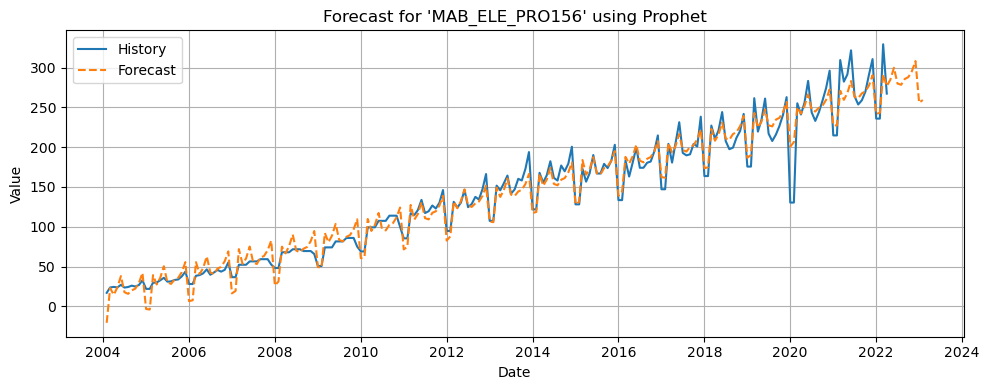

13:56:32 - cmdstanpy - INFO - Chain [1] start processing
13:56:32 - cmdstanpy - INFO - Chain [1] done processing


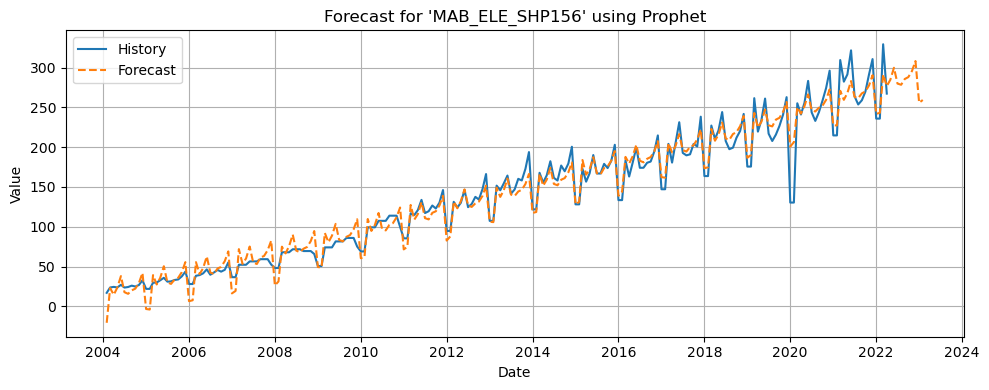

13:56:32 - cmdstanpy - INFO - Chain [1] start processing
13:56:32 - cmdstanpy - INFO - Chain [1] done processing


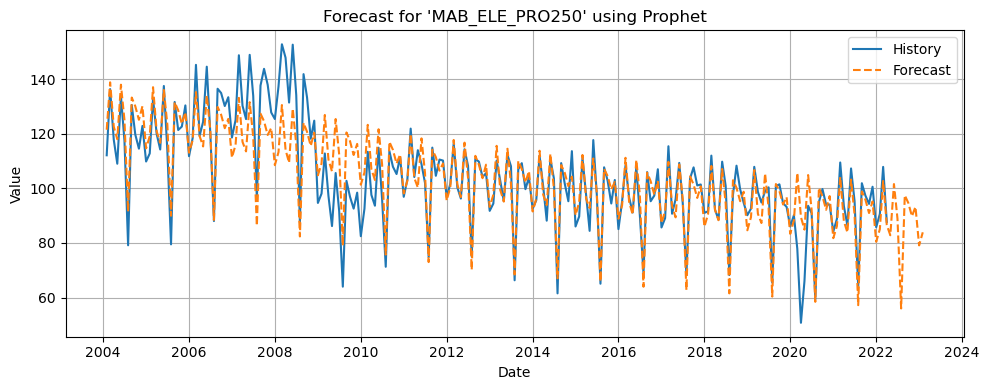

13:56:32 - cmdstanpy - INFO - Chain [1] start processing
13:56:32 - cmdstanpy - INFO - Chain [1] done processing


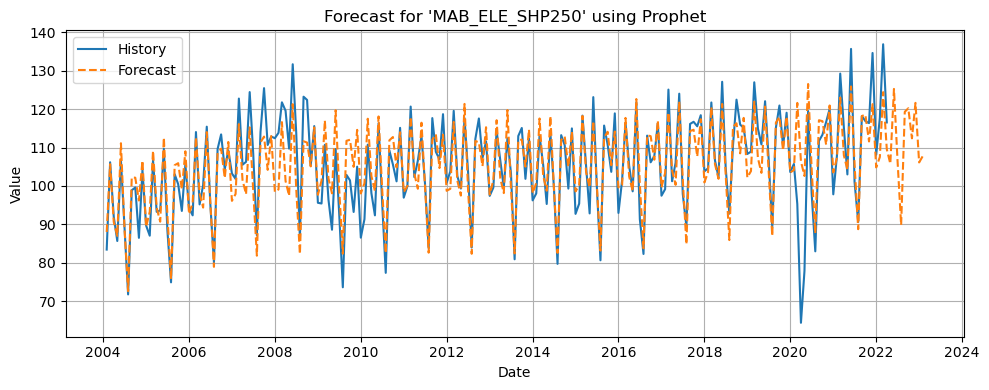

13:56:33 - cmdstanpy - INFO - Chain [1] start processing
13:56:33 - cmdstanpy - INFO - Chain [1] done processing


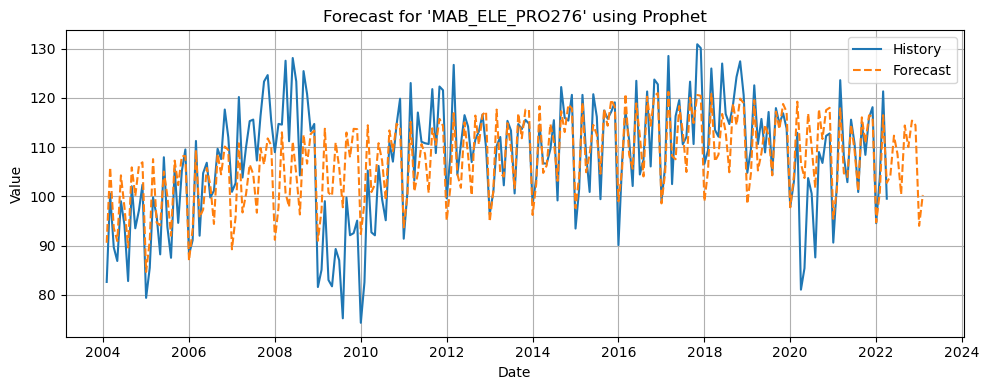

13:56:33 - cmdstanpy - INFO - Chain [1] start processing
13:56:33 - cmdstanpy - INFO - Chain [1] done processing


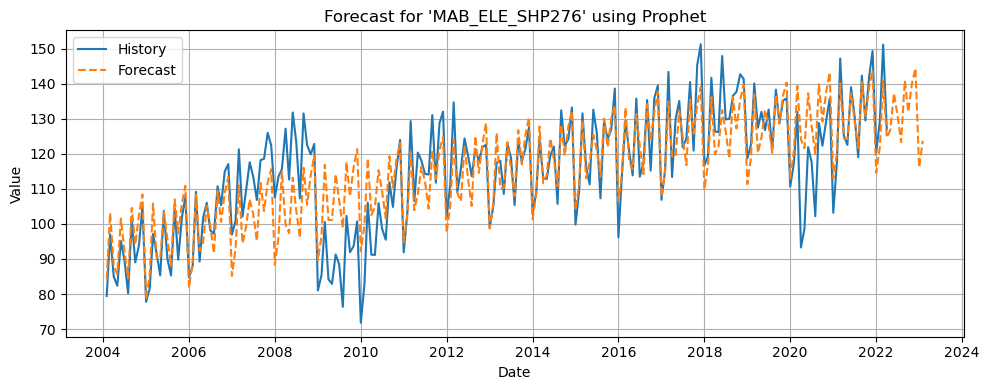

13:56:33 - cmdstanpy - INFO - Chain [1] start processing
13:56:33 - cmdstanpy - INFO - Chain [1] done processing


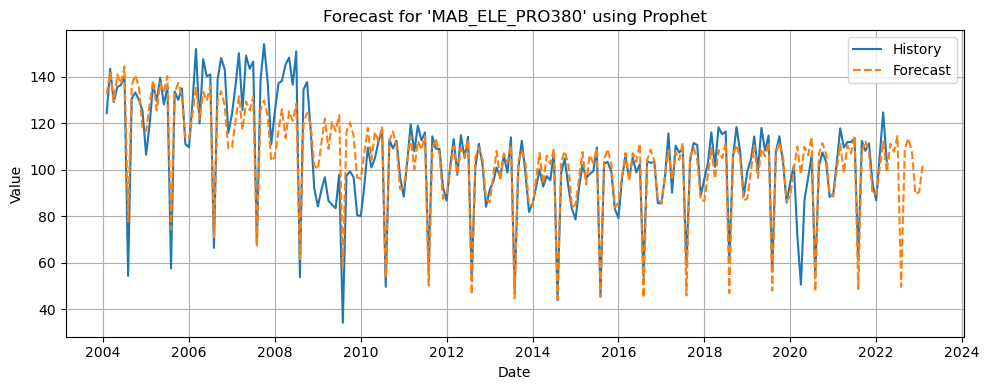

13:56:33 - cmdstanpy - INFO - Chain [1] start processing
13:56:33 - cmdstanpy - INFO - Chain [1] done processing


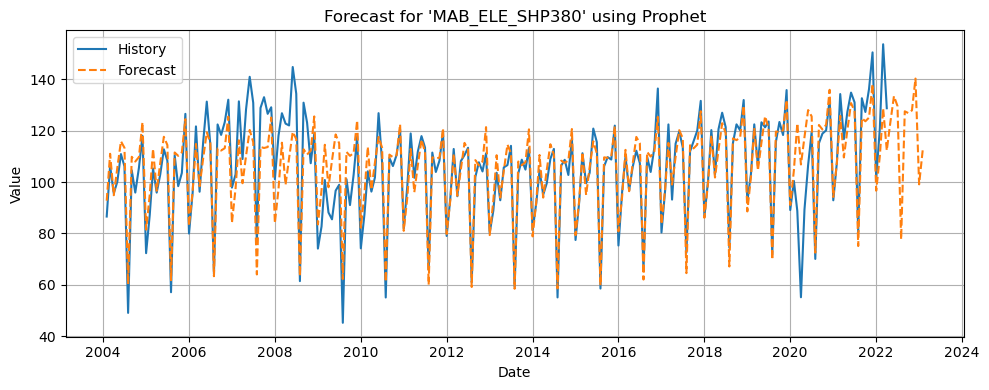

13:56:33 - cmdstanpy - INFO - Chain [1] start processing
13:56:33 - cmdstanpy - INFO - Chain [1] done processing


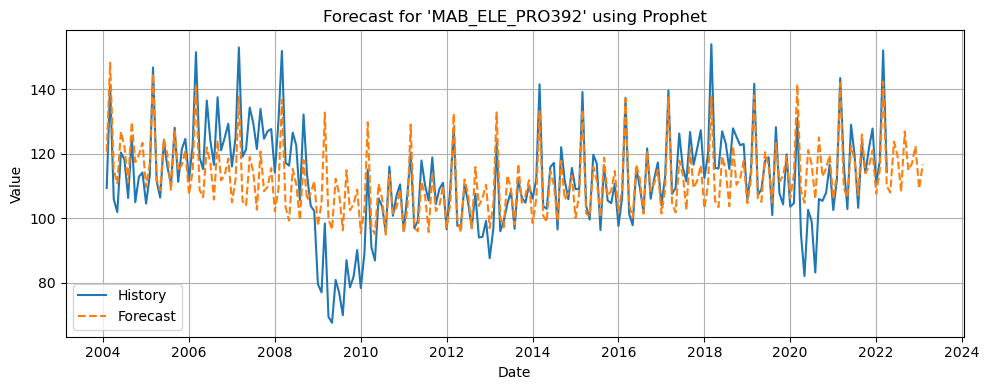

13:56:33 - cmdstanpy - INFO - Chain [1] start processing
13:56:33 - cmdstanpy - INFO - Chain [1] done processing


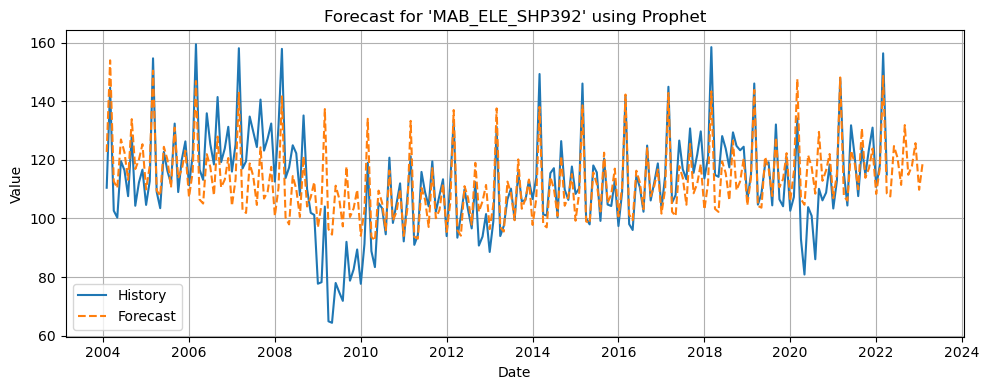

13:56:34 - cmdstanpy - INFO - Chain [1] start processing
13:56:34 - cmdstanpy - INFO - Chain [1] done processing


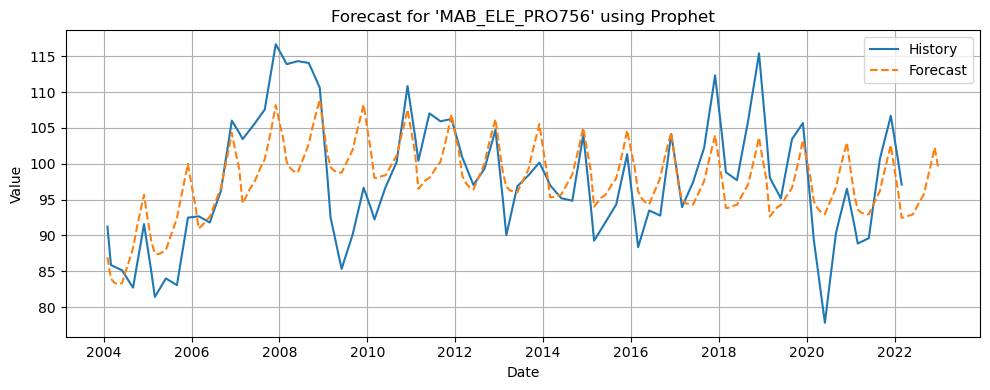

13:56:34 - cmdstanpy - INFO - Chain [1] start processing
13:56:34 - cmdstanpy - INFO - Chain [1] done processing


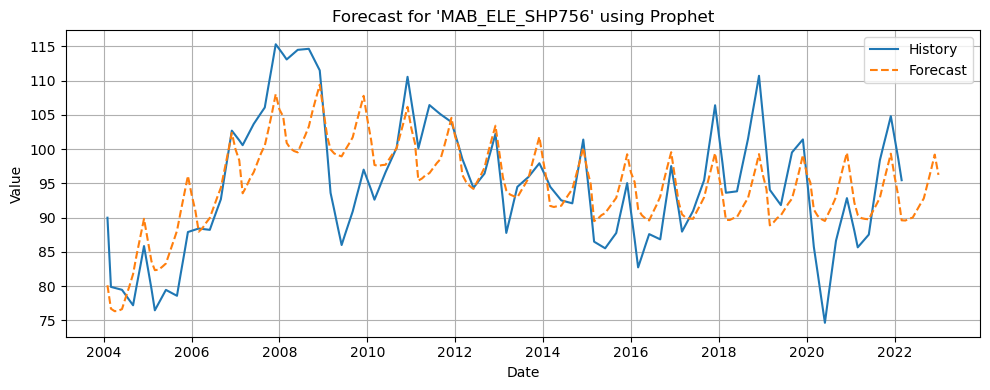

13:56:34 - cmdstanpy - INFO - Chain [1] start processing
13:56:34 - cmdstanpy - INFO - Chain [1] done processing


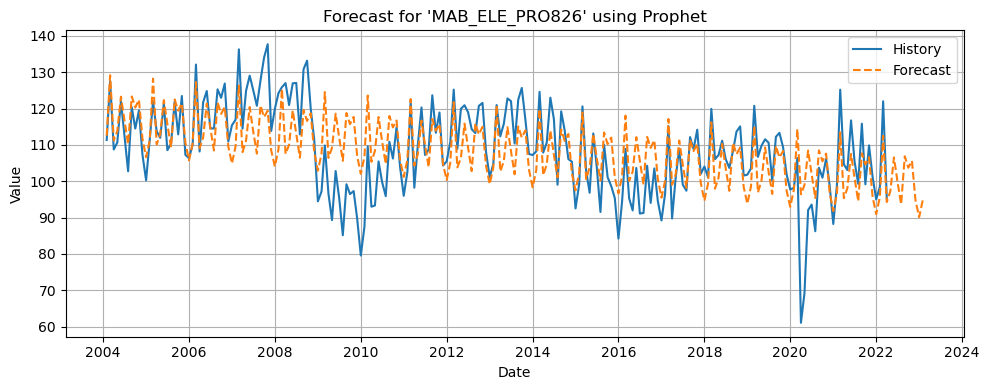

13:56:34 - cmdstanpy - INFO - Chain [1] start processing
13:56:34 - cmdstanpy - INFO - Chain [1] done processing


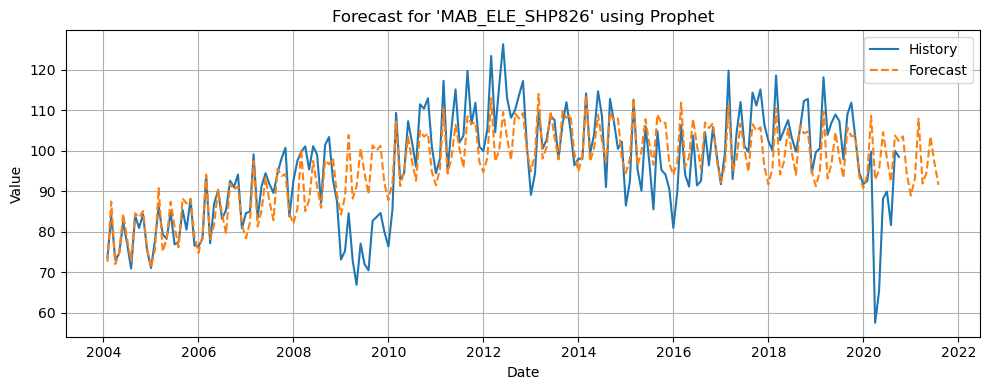

13:56:34 - cmdstanpy - INFO - Chain [1] start processing
13:56:34 - cmdstanpy - INFO - Chain [1] done processing


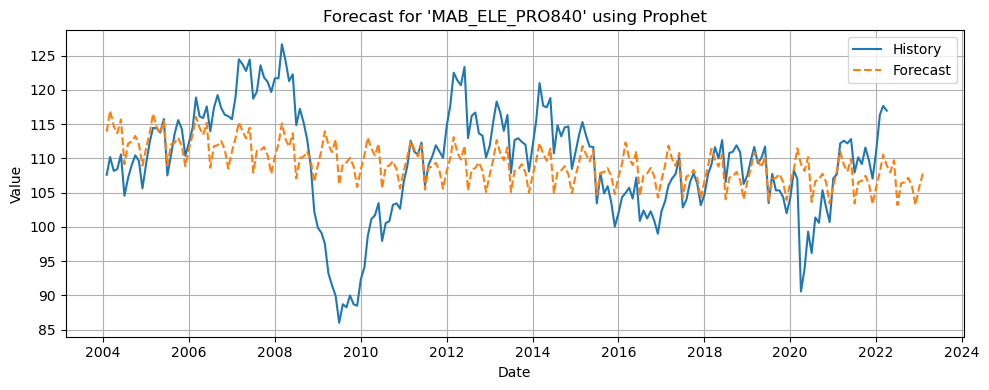

13:56:34 - cmdstanpy - INFO - Chain [1] start processing
13:56:34 - cmdstanpy - INFO - Chain [1] done processing


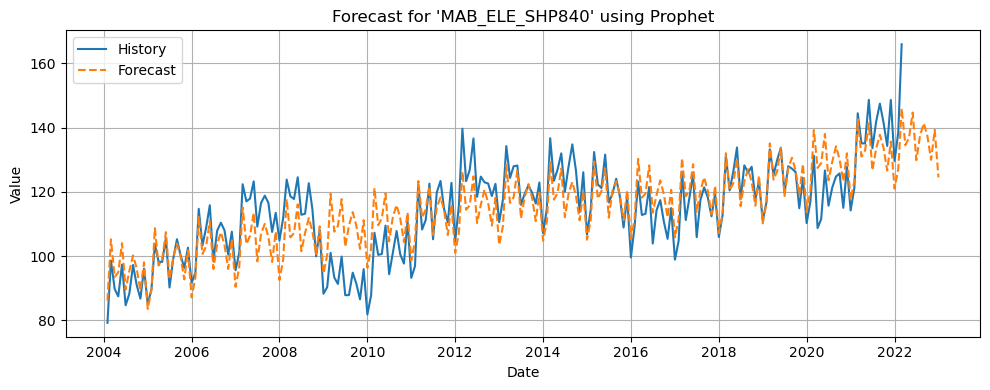

13:56:35 - cmdstanpy - INFO - Chain [1] start processing
13:56:35 - cmdstanpy - INFO - Chain [1] done processing


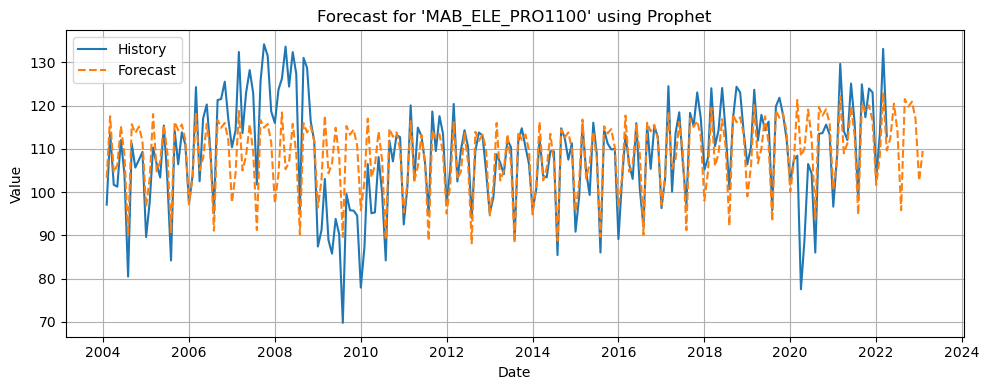

13:56:35 - cmdstanpy - INFO - Chain [1] start processing
13:56:35 - cmdstanpy - INFO - Chain [1] done processing


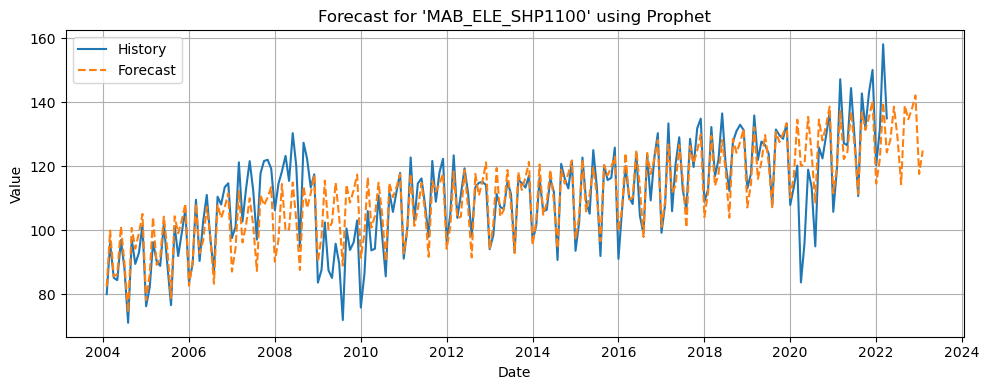

13:56:35 - cmdstanpy - INFO - Chain [1] start processing
13:56:35 - cmdstanpy - INFO - Chain [1] done processing


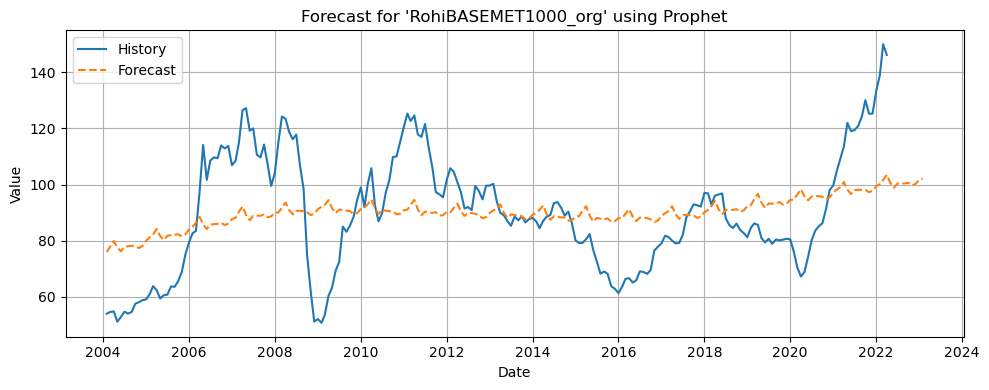

13:56:35 - cmdstanpy - INFO - Chain [1] start processing
13:56:35 - cmdstanpy - INFO - Chain [1] done processing


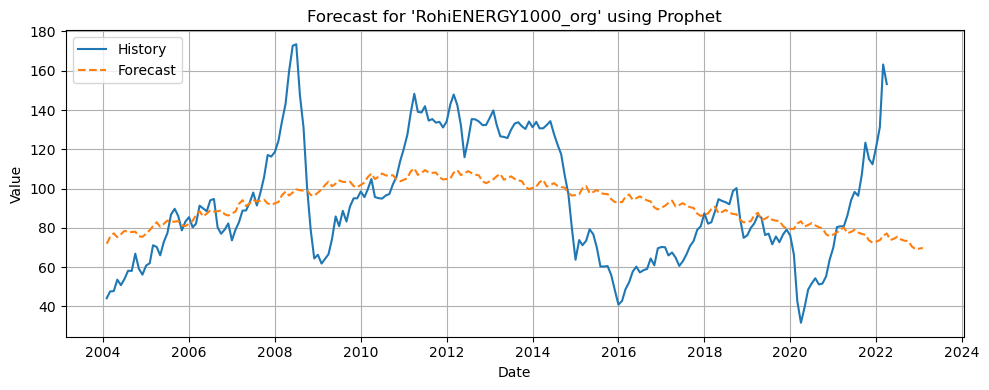

13:56:35 - cmdstanpy - INFO - Chain [1] start processing
13:56:35 - cmdstanpy - INFO - Chain [1] done processing


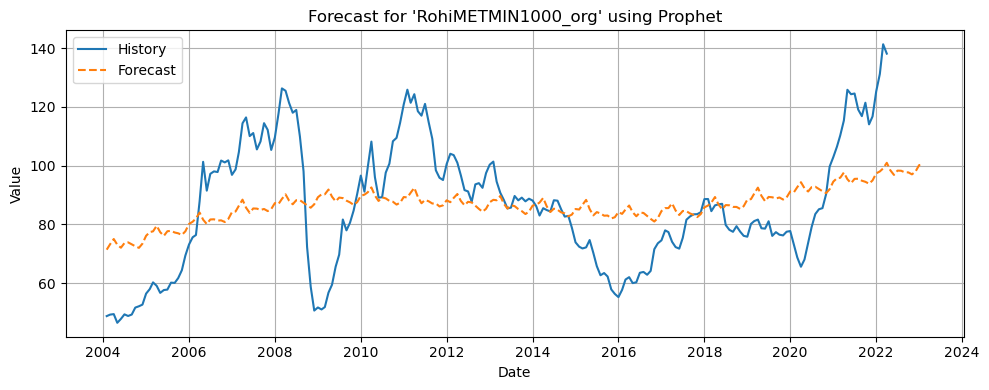

13:56:35 - cmdstanpy - INFO - Chain [1] start processing
13:56:35 - cmdstanpy - INFO - Chain [1] done processing


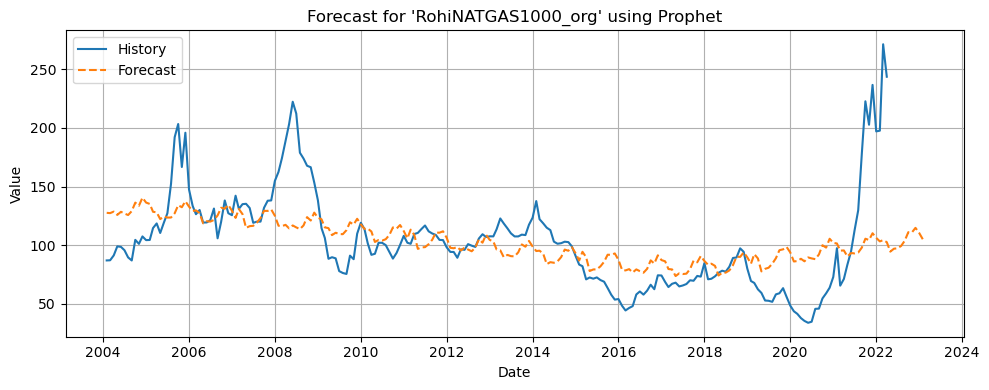

13:56:36 - cmdstanpy - INFO - Chain [1] start processing
13:56:36 - cmdstanpy - INFO - Chain [1] done processing


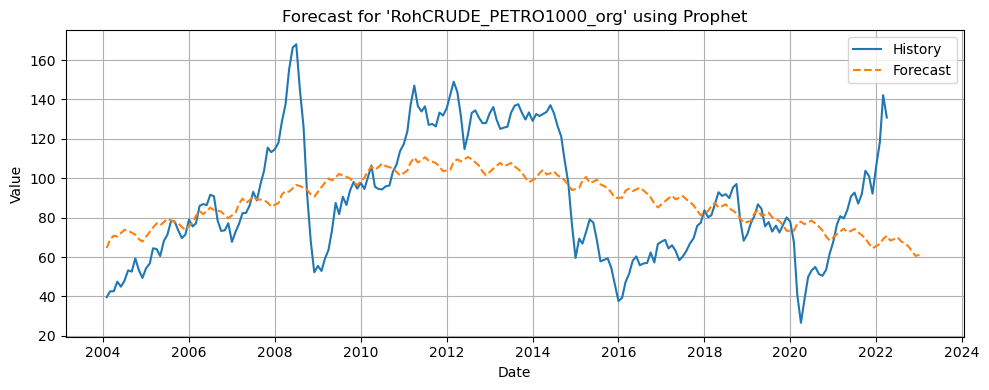

13:56:36 - cmdstanpy - INFO - Chain [1] start processing
13:56:36 - cmdstanpy - INFO - Chain [1] done processing


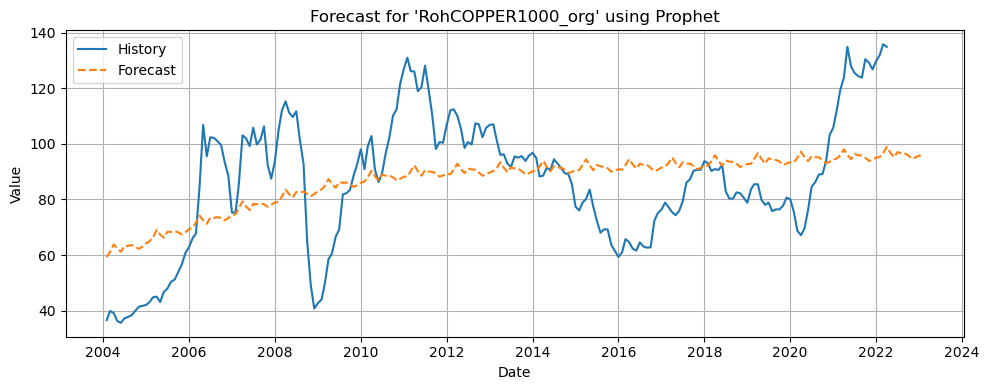

13:56:36 - cmdstanpy - INFO - Chain [1] start processing
13:56:36 - cmdstanpy - INFO - Chain [1] done processing


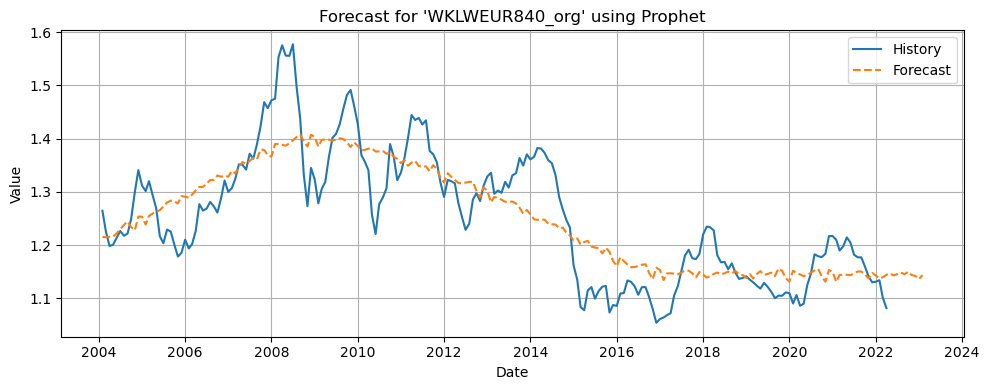

13:56:36 - cmdstanpy - INFO - Chain [1] start processing
13:56:36 - cmdstanpy - INFO - Chain [1] done processing


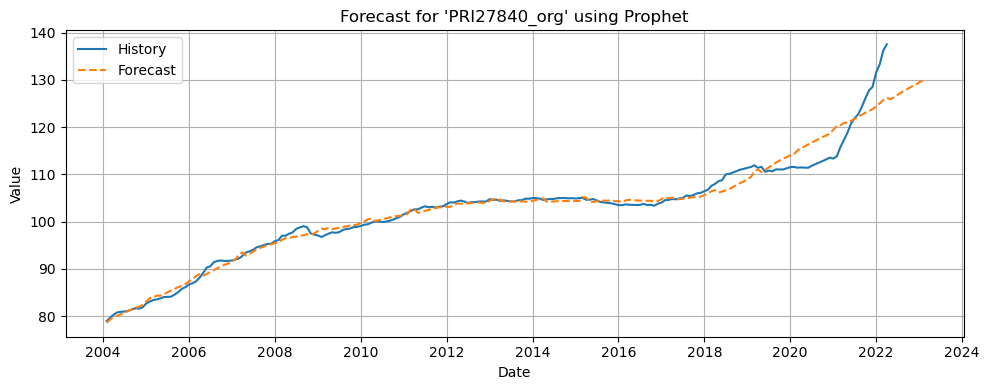

13:56:36 - cmdstanpy - INFO - Chain [1] start processing
13:56:36 - cmdstanpy - INFO - Chain [1] done processing


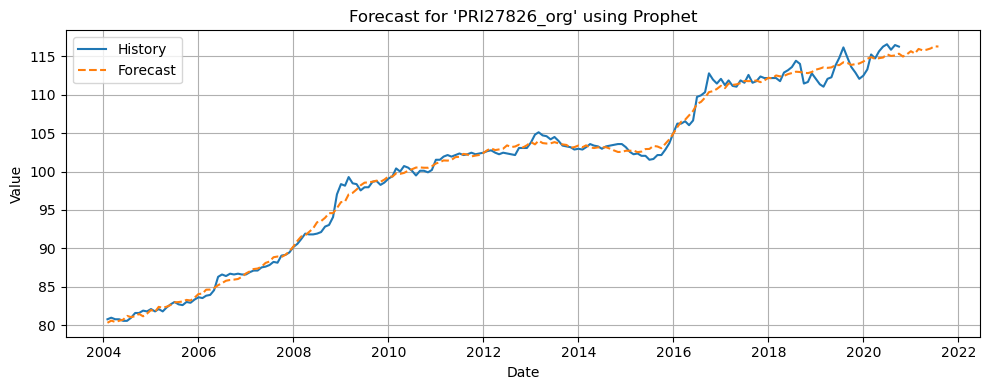

13:56:36 - cmdstanpy - INFO - Chain [1] start processing
13:56:36 - cmdstanpy - INFO - Chain [1] done processing


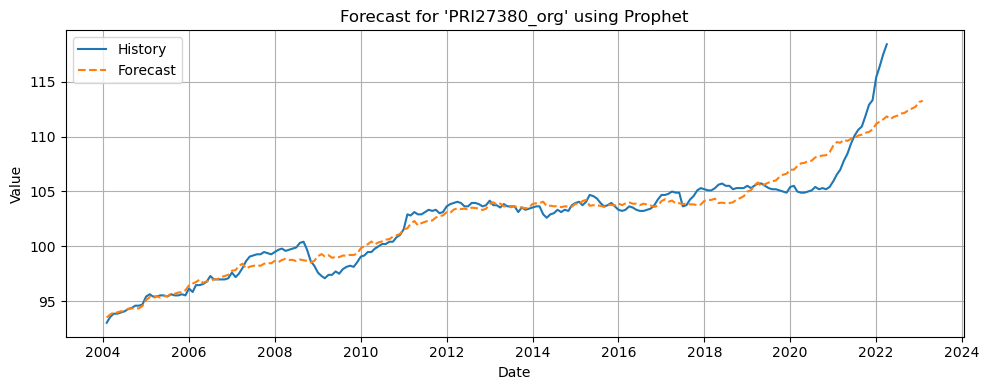

13:56:37 - cmdstanpy - INFO - Chain [1] start processing
13:56:37 - cmdstanpy - INFO - Chain [1] done processing


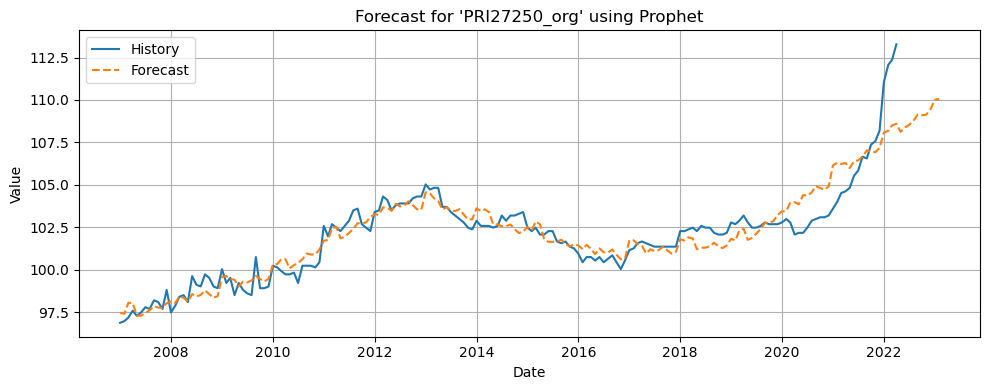

13:56:37 - cmdstanpy - INFO - Chain [1] start processing
13:56:37 - cmdstanpy - INFO - Chain [1] done processing


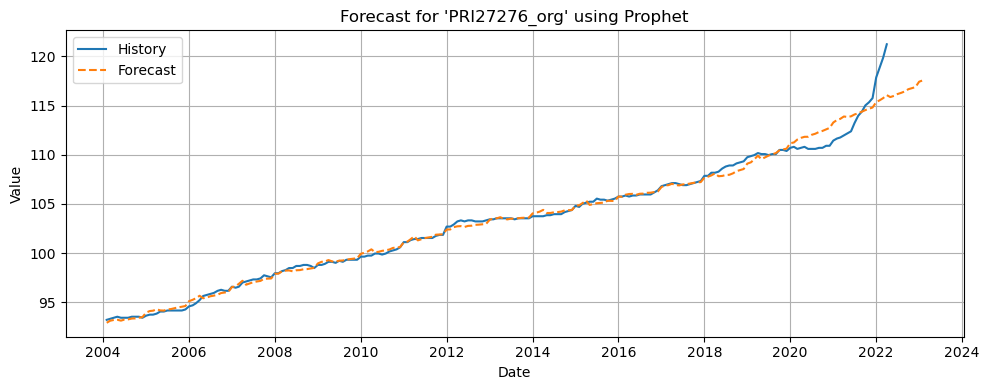

13:56:37 - cmdstanpy - INFO - Chain [1] start processing
13:56:37 - cmdstanpy - INFO - Chain [1] done processing


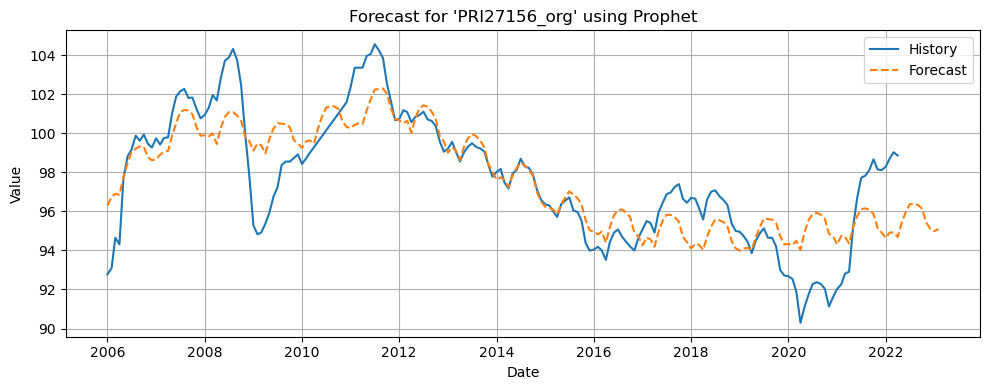

13:56:37 - cmdstanpy - INFO - Chain [1] start processing
13:56:37 - cmdstanpy - INFO - Chain [1] done processing


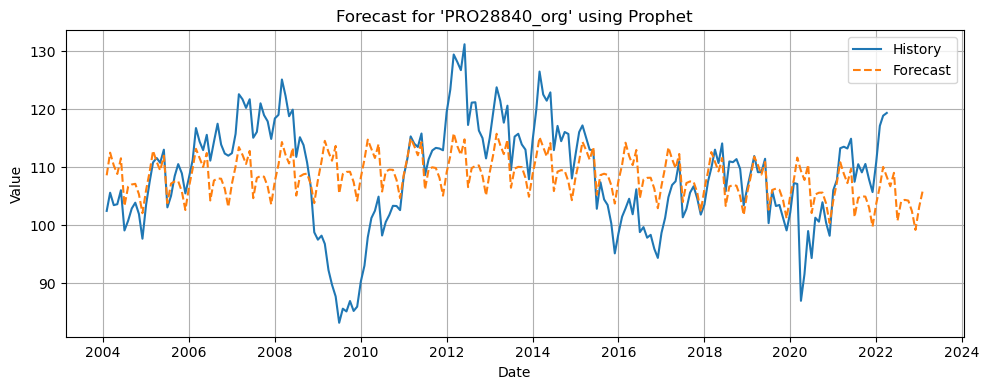

13:56:37 - cmdstanpy - INFO - Chain [1] start processing
13:56:37 - cmdstanpy - INFO - Chain [1] done processing


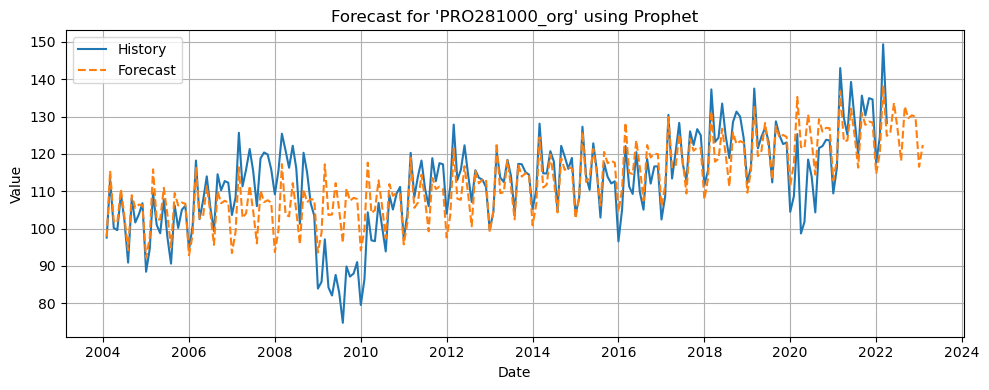

13:56:37 - cmdstanpy - INFO - Chain [1] start processing
13:56:37 - cmdstanpy - INFO - Chain [1] done processing


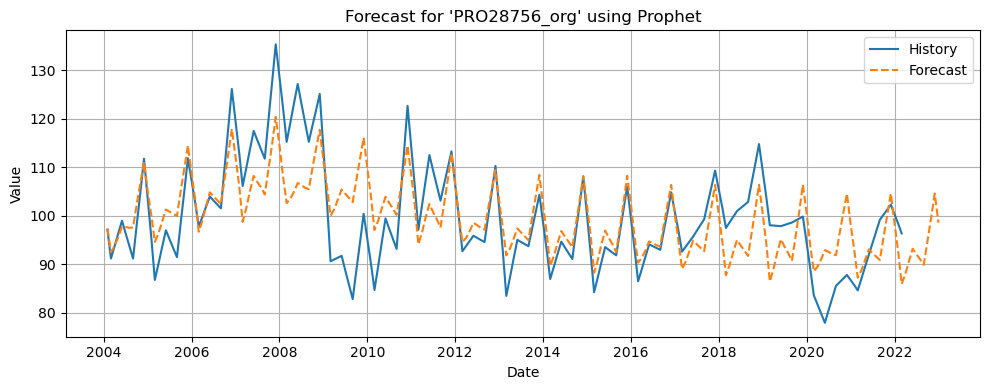

13:56:38 - cmdstanpy - INFO - Chain [1] start processing
13:56:38 - cmdstanpy - INFO - Chain [1] done processing


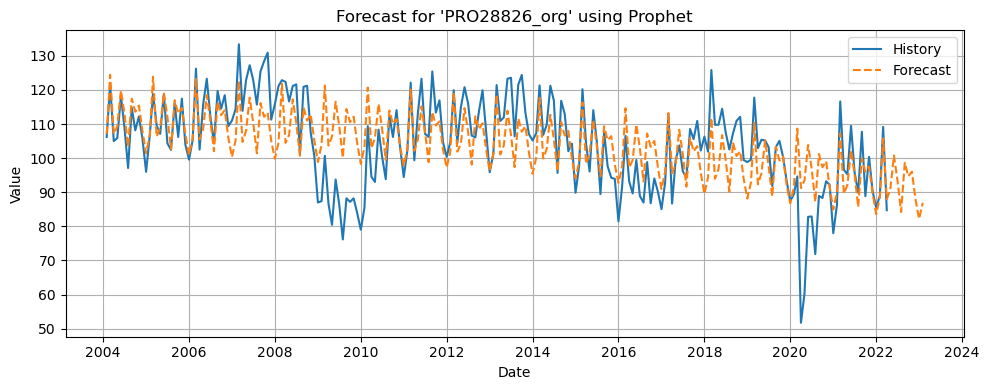

13:56:38 - cmdstanpy - INFO - Chain [1] start processing
13:56:38 - cmdstanpy - INFO - Chain [1] done processing


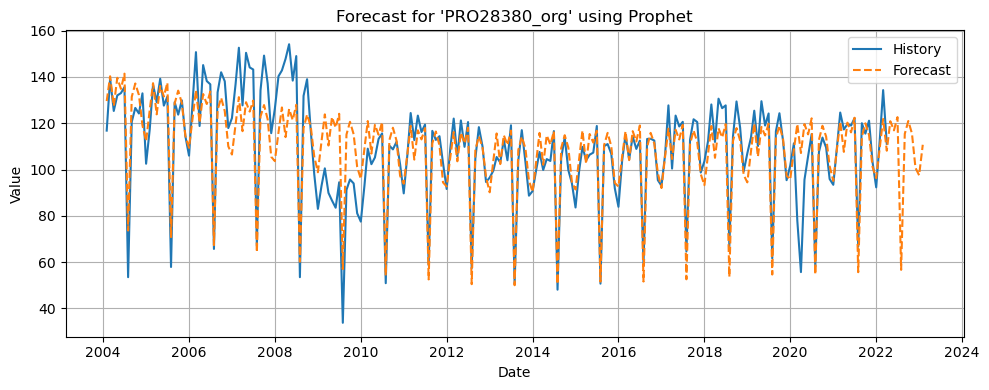

13:56:38 - cmdstanpy - INFO - Chain [1] start processing
13:56:38 - cmdstanpy - INFO - Chain [1] done processing


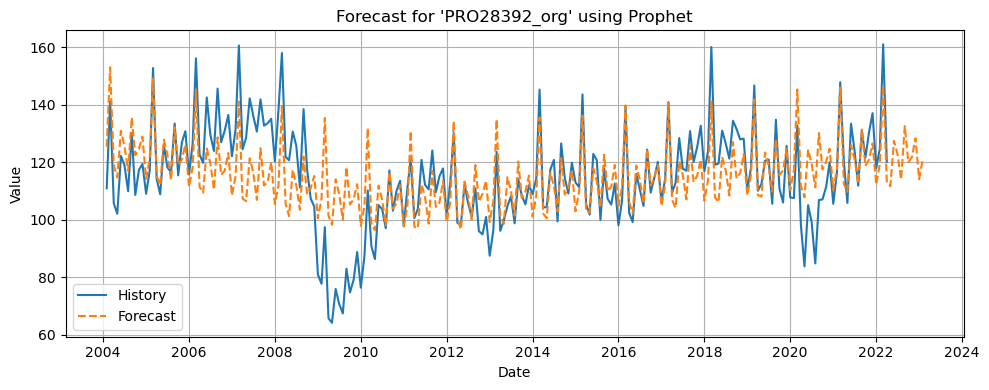

13:56:38 - cmdstanpy - INFO - Chain [1] start processing
13:56:38 - cmdstanpy - INFO - Chain [1] done processing


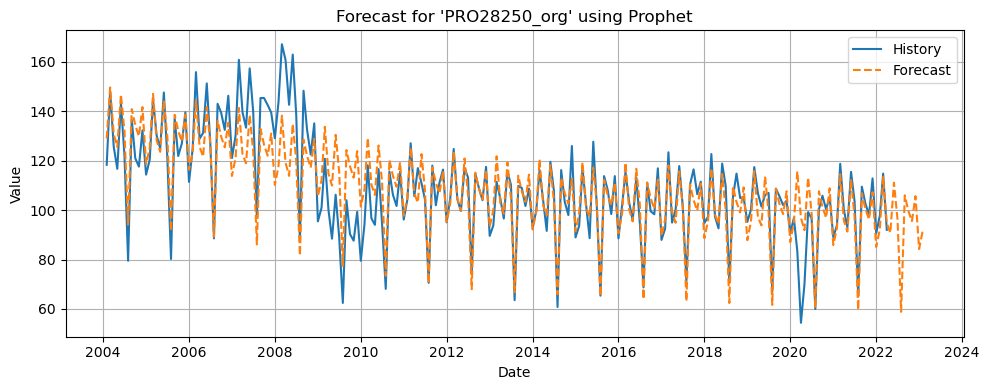

13:56:38 - cmdstanpy - INFO - Chain [1] start processing
13:56:38 - cmdstanpy - INFO - Chain [1] done processing


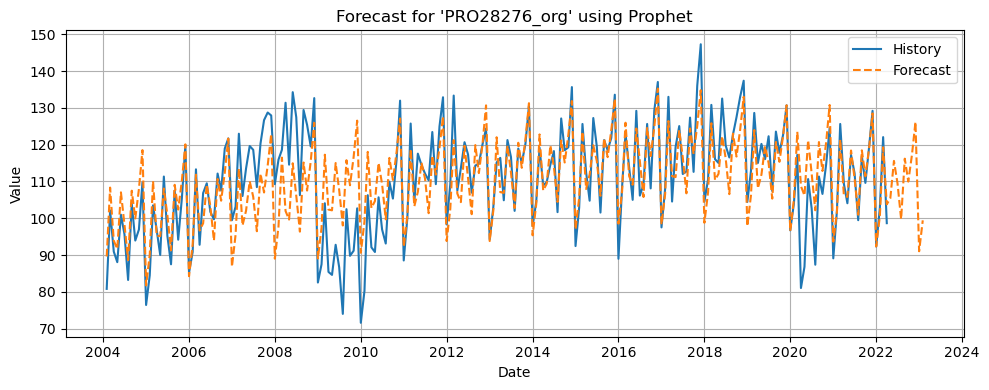

13:56:38 - cmdstanpy - INFO - Chain [1] start processing
13:56:38 - cmdstanpy - INFO - Chain [1] done processing


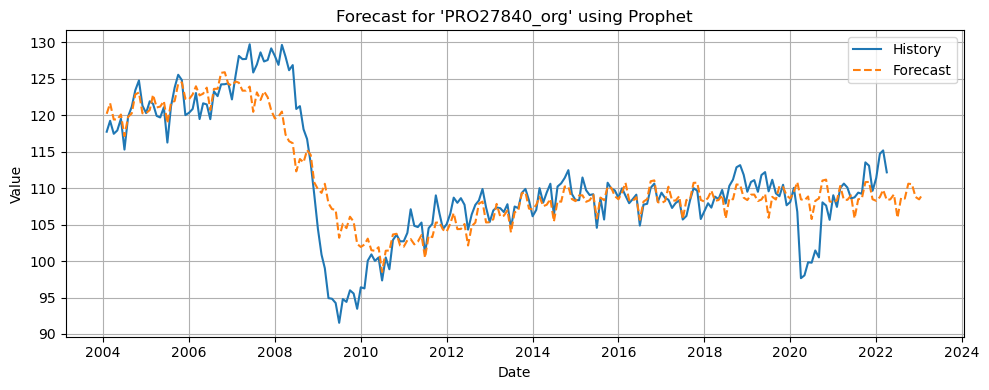

13:56:39 - cmdstanpy - INFO - Chain [1] start processing
13:56:39 - cmdstanpy - INFO - Chain [1] done processing


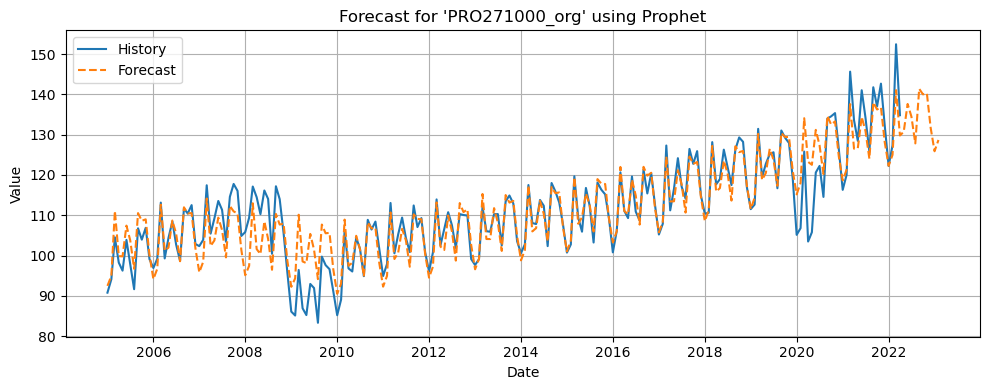

13:56:39 - cmdstanpy - INFO - Chain [1] start processing
13:56:39 - cmdstanpy - INFO - Chain [1] done processing


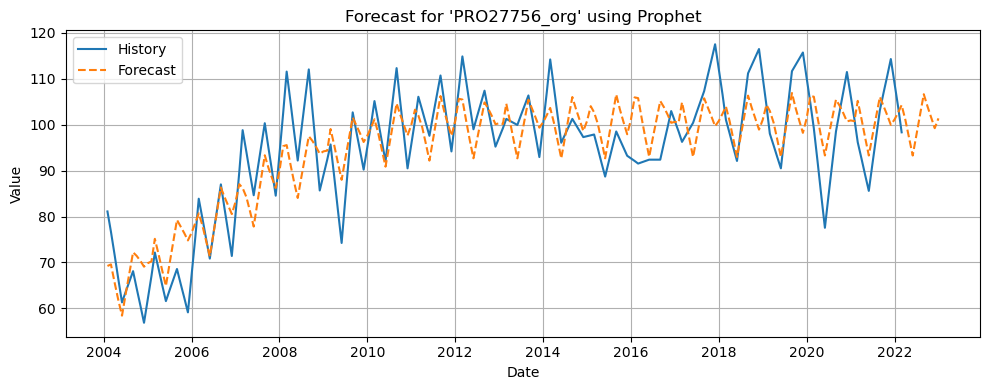

13:56:39 - cmdstanpy - INFO - Chain [1] start processing
13:56:39 - cmdstanpy - INFO - Chain [1] done processing


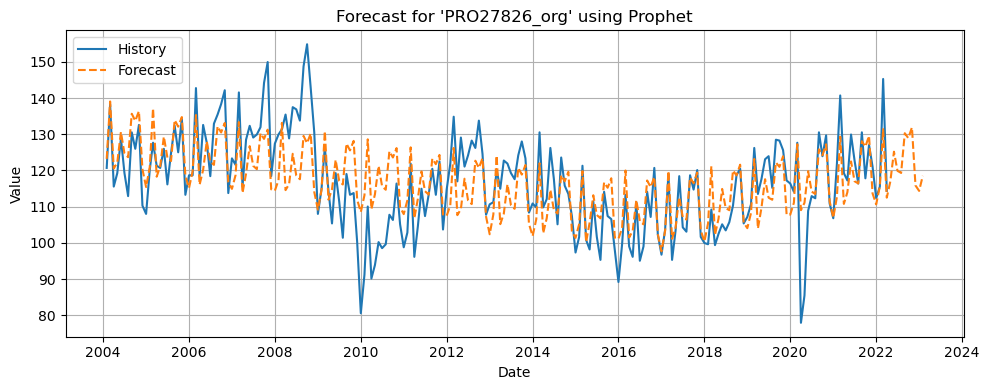

13:56:39 - cmdstanpy - INFO - Chain [1] start processing
13:56:39 - cmdstanpy - INFO - Chain [1] done processing


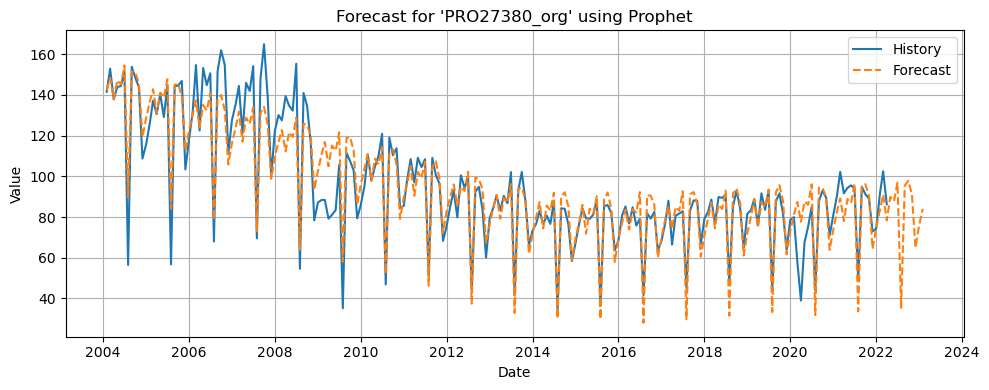

13:56:39 - cmdstanpy - INFO - Chain [1] start processing
13:56:39 - cmdstanpy - INFO - Chain [1] done processing


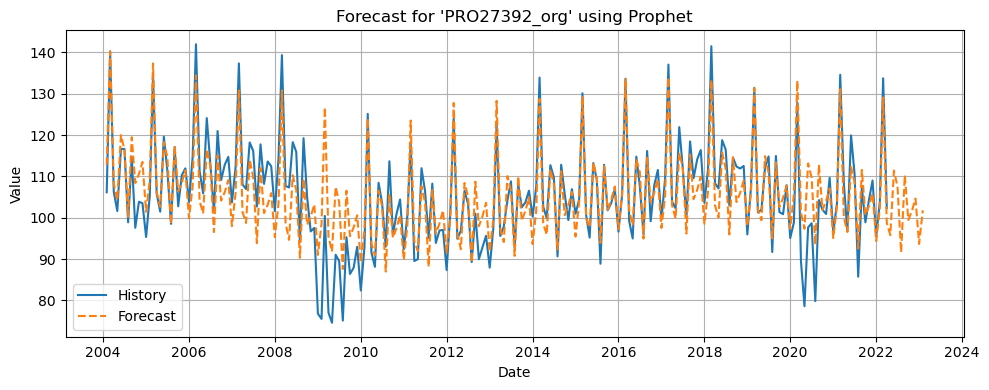

13:56:39 - cmdstanpy - INFO - Chain [1] start processing
13:56:39 - cmdstanpy - INFO - Chain [1] done processing


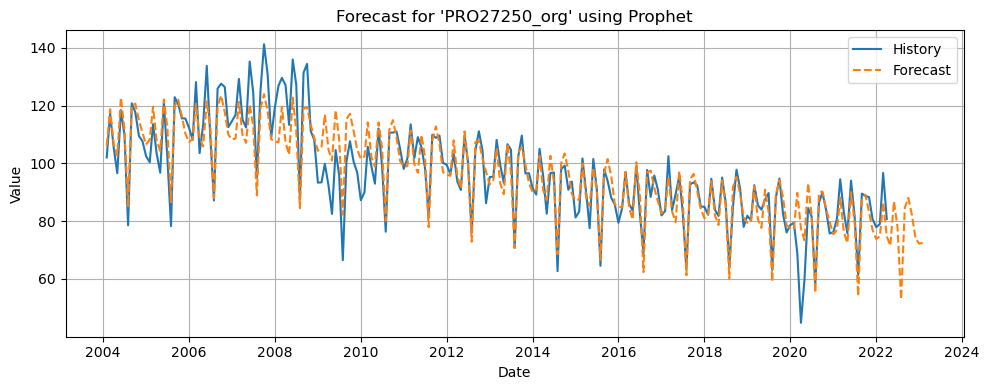

13:56:40 - cmdstanpy - INFO - Chain [1] start processing
13:56:40 - cmdstanpy - INFO - Chain [1] done processing


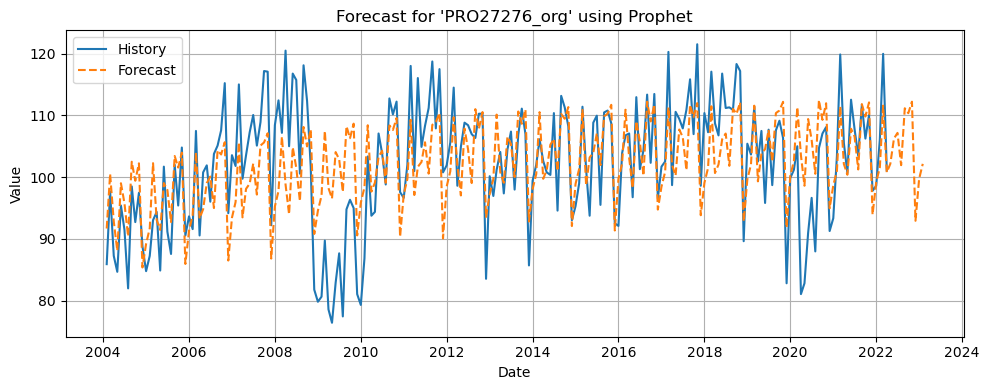

In [15]:
forcast = forecast_market_features_prophet(df_market, date_column='date', forecast_horizon=10, plot=True)

In [16]:
def append_forecasts_to_market_df(market_df, forecasts, date_column='date'):
    """
    Appends 10-month forecasts to market_df using forecast results per feature.

    Parameters:
        market_df (pd.DataFrame): Original market data.
        forecasts (dict): Dictionary of {feature: pd.Series or pd.DataFrame} with date index.
        date_column (str): Name of the datetime column in original market_df.

    Returns:
        pd.DataFrame: market_df extended with forecasted rows.
    """
    # Make sure the original date column is datetime and index is set
    df = market_df.copy()
    df[date_column] = pd.to_datetime(df[date_column])
    df = df.set_index(date_column).asfreq("MS")

    # Create empty DataFrame for forecasts
    forecast_df = pd.DataFrame(index=next(iter(forecasts.values())).index)

    for feature, forecast_series in forecasts.items():
        if isinstance(forecast_series, pd.DataFrame):
            forecast_df[feature] = forecast_series['yhat']
        else:
            forecast_df[feature] = forecast_series

    # Combine original + forecasted data
    extended_df = pd.concat([df, forecast_df])
    extended_df = extended_df.reset_index().rename(columns={'index': date_column})

    return extended_df


In [17]:
extended_df = append_forecasts_to_market_df(df_market, forcast, date_column='date')

In [18]:
extended_df.tail(15)

date  MAB_ELE_PRO156  MAB_ELE_SHP156  MAB_ELE_PRO250  \
214 2021-12-01      310.763183      310.763183      100.565744   
215 2022-01-01      235.956129      235.956129       85.743503   
216 2022-02-01      235.956129      235.956129       90.603540   
217 2022-03-01      329.413367      329.413367      107.843548   
218 2022-04-01      267.373145      267.373145       87.698110   
219 2022-05-01      284.705297      284.705297       82.800907   
220 2022-06-01      299.878775      299.878775      101.551272   
221 2022-07-01      279.974458      279.974458       88.853358   
222 2022-08-01      278.505055      278.505055       56.007584   
223 2022-09-01      285.760873      285.760873       97.446049   
224 2022-10-01      288.104037      288.104037       94.648782   
225 2022-11-01      295.711209      295.711209       89.755194   
226 2022-12-01      308.316579      308.316579       93.222722   
227 2023-01-01      255.911118      255.911118       79.097960   
228 2023-02-01      259.351605      259.351605       83.886416   

     MAB_ELE_SHP250  MAB_ELE_PRO276  MAB_ELE_SHP276  MAB_ELE_PRO380  \
214      134.589504      118.103281      149.364286       94.006826   
215      108.156320       94.550610      120.353403       86.851008   
216      117.715770      103.987916      129.383676      106.583758   
217      136.858720      121.308119      151.201314      124.637966   
218      116.528738       99.522205      127.022869      103.556690   
219      105.783405      104.107930      126.857905      111.173581   
220      125.241499      112.314706      137.272671      107.745821   
221      106.805138      108.594638      131.147734      114.465473   
222       89.841885      100.428230      123.356603       49.756266   
223      119.282690      114.383880      140.981783      108.970914   
224      120.211415      110.003724      131.971931      113.443509   
225      112.396174      115.374273      140.148908      107.660143   
226      121.617225      114.446130      144.472396       89.463533   
227      106.122995       94.017100      116.107815       90.482728   
228      107.778856      100.287224      123.707003      102.246645   

     MAB_ELE_SHP380  MAB_ELE_PRO392  ...  PRO28250_org  PRO28276_org  \
214      150.482735      127.771735  ...    112.791885    129.188248   
215      101.258277      110.460181  ...     90.558372     92.343117   
216      120.956538      117.879631  ...     97.766502    102.820961   
217      153.645142      152.000561  ...    114.720810    122.049515   
218      128.733305      114.262328  ...     91.979698     98.675873   
219      123.106902      107.958606  ...     90.770574    105.433611   
220      133.461302      123.708718  ...    111.052570    115.584072   
221      129.597436      119.394360  ...     96.378873    109.526926   
222       77.666941      108.230511  ...     58.854804     99.756827   
223      127.534826      126.895043  ...    105.931766    116.189690   
224      126.859279      114.879491  ...     99.704014    109.974120   
225      127.899168      116.908495  ...     95.505349    117.235409   
226      140.288642      122.327174  ...    105.606353    126.185651   
227       99.100049      109.159379  ...     84.255075     91.043847   
228      112.664153      116.648219  ...     91.794904     99.440961   

     PRO27840_org  PRO271000_org  PRO27756_org  PRO27826_org  PRO27380_org  \
214    109.624107     132.281006    114.326241    121.065762     72.915611   
215    111.364670     122.236023    108.999212    112.324119     74.355736   
216    114.688400     127.373421    103.672183    115.557330     91.182419   
217    115.164093     152.452942     98.345154    145.254965    102.475998   
218    112.158089     134.843353           NaN    114.359844     86.255684   
219    108.456714     130.727306     97.225185    116.957579     89.902521   
220    109.141157     137.632543     93.286003    125.176184     87.813106   
221    105.937600     134.512578     97